# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
# Import dataset via data folder
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
# I will use the column names as they are by default

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math Scores (AVG_MATH_8_SCORE)

How many years of data are logged in our dataset? 

In [20]:
# Subtract smallest year from largest year in order to get total number of years covered by the dataset
print(df['YEAR'].max() - df['YEAR'].min(), "years of data are logged in our dataset.")

33 years of data are logged in our dataset


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [21]:
# Group dataset by state and take means of grade 8 math scores for Ohio and Michigan, printing results
print("Ohio: ", df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['OHIO'])

print("Michigan: ", df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['MICHIGAN'])

print("Ohio has a greater average grade 8 math score across all years.")

Ohio:  282.25
Michigan:  276.1666666666667
Ohio has a greater average grade 8 math score across all years.


Find the average for your outcome score across all states in 2019

In [24]:
# Group dataset by year, then find average from 2019, printing results
print("Average score across all states in 2019: ", df.groupby('YEAR')['AVG_MATH_8_SCORE'].mean()[2019])

Average score across all states in 2019:  281.2641509433962


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [30]:
# Group dataset by state, then take the max from each state, printing results
print(df.groupby('STATE')['AVG_MATH_8_SCORE'].max())

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [42]:
# Create two new features; see justification below for explanation
df['PERCENT_TOTAL_REV_ON_EDUCATION'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_REVENUE']
df['EDUCATION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']

Feature engineering justification: I felt that expenditure on education was important, but the raw expenditure numbers were not as valuable since they were not standardized on the size of a state. To account for this, I took the state's instruction expenditure and divided by the state's total revenue to obtain a measure that will hopefully indicate how committed a state is to its education. Likewise, I felt that another way to standardize education expenditure would be to do it on a per student basis, which is what the second variable measures.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average 8th Grade Math Score')

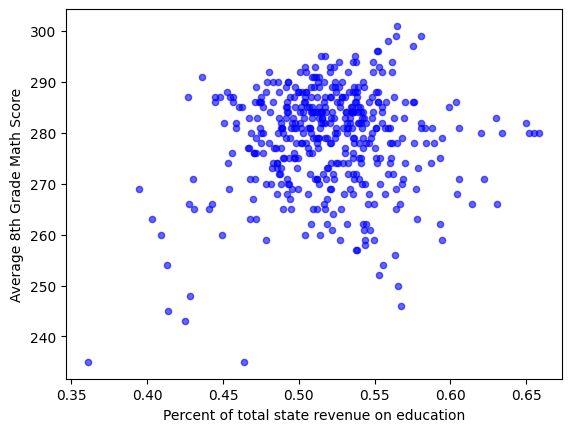

In [44]:
# Create scatter plot of first new feature (x) vs. outcome score (y)
df.plot.scatter(x='PERCENT_TOTAL_REV_ON_EDUCATION', y='AVG_MATH_8_SCORE', alpha=0.6, c = 'blue')
plt.xlabel('Percent of total state revenue on education')
plt.ylabel('Average 8th Grade Math Score')

Caption A state's percentage of total revenue spent on education appears not to have a strong correlation with average 8th grade math scores in that state. While there is a general positive trend, the data is not particularly indicative of any linear patttern.

**Visualization 2**

Text(0, 0.5, 'Average 8th Grade Math Score')

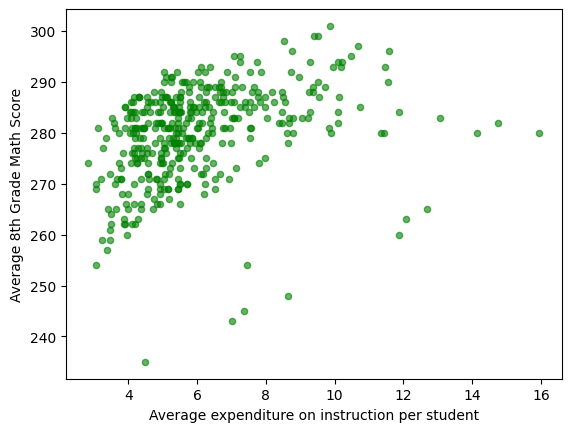

In [45]:
# Create scatter plot of second new feature (x) vs. outcome score (y)
df.plot.scatter(x='EDUCATION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6, c = 'green')
plt.xlabel('Average expenditure on instruction per student')
plt.ylabel('Average 8th Grade Math Score')

Caption: A state's average expenditure on educational instruction per student appears to have a fairly strong, positive relationship with average 8th grade math scores in that state. While there does appear to be a band of outliers further down on the y-axis, most of the data forms a relatively linear pattern in the positive direction.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Create X (predictor) and y (response) variables, which is necessary to perform regression
# My X variables will be the two that I created and did EDA on, as well as outcome scores from 4th grade math and 8th grade reading
X = df[['EDUCATION_EXPENDITURE_PER_STUDENT', 'PERCENT_TOTAL_REV_ON_EDUCATION','AVG_READING_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

# Fill NaN in y with median of y
y.fillna(y.median(), inplace=True)



In [67]:
# Create training and testing sets via train_test_split that was imported earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
# Create model, simply using linear regression from sklearn
linearModel = LinearRegression()

In [70]:
linearModel.fit(X_train, y_train)

print(linearModel.intercept_)
print(linearModel.coef_)

-38.68751653672513
[-6.44528365e-03 -7.23422056e+00  5.27446018e-01  7.72173245e-01]


In [71]:
y_pred = linearModel.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [72]:
# Outputs R^2 value for the model
print("R^2 =", linearModel.score(X_test, y_test))

# Outputs mean absolute error of the model's prediction for test data vs. the actual testing data
print("Mean absolute error = ", np.mean(np.abs(y_pred-y_test)))

# With an R^2 of 0.87 and a mean absolute error of 2.22 points on a 500 point scale, our model seems decently strong.

R^2 = 0.8709938054011537
Mean absolute error =  2.221183291405732


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

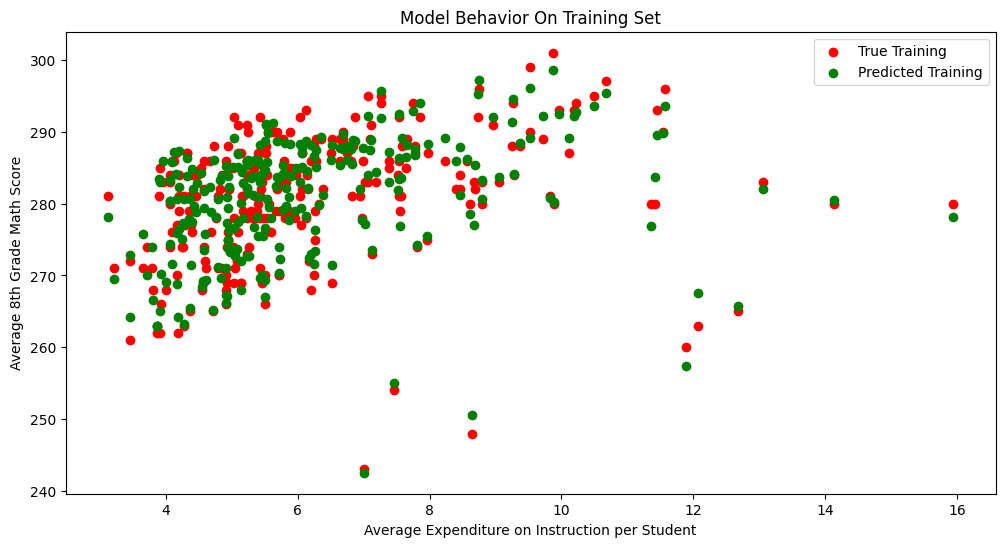

In [74]:
# Print the scatter plot of average 8th grade math score vs. average expenditure per student including both actual and predicted 8th grade math scores for the training data subset
col_name = 'EDUCATION_EXPENDITURE_PER_STUDENT'
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], linearModel.predict(X_train), color = "green")
plt.legend(['True Training','Predicted Training'])
plt.xlabel('Average Expenditure on Instruction per Student')
plt.ylabel('Average 8th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

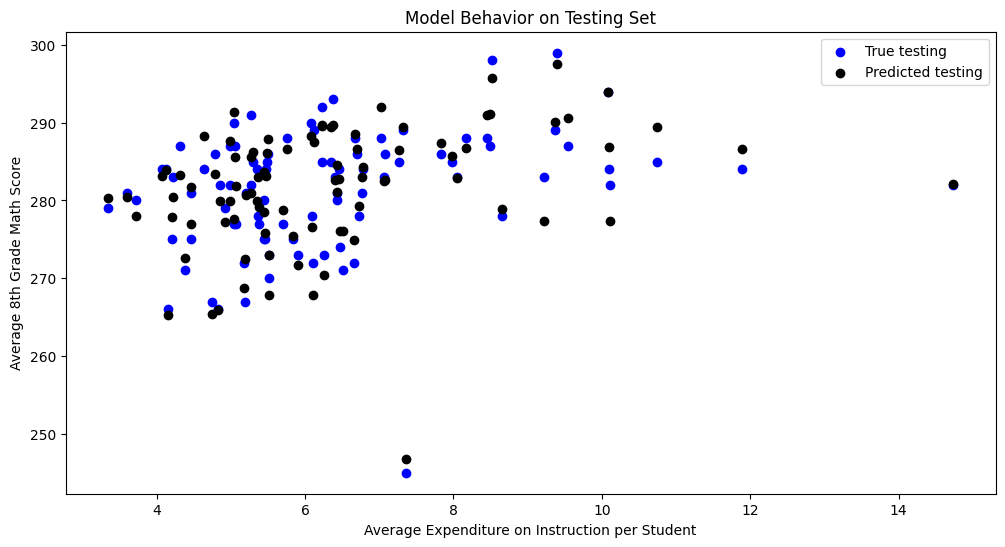

In [75]:
# Print the scatter plot of average 8th grade math score vs. average expenditure per student including both actual and predicted 8th grade math scores for the testing data subset
col_name = 'EDUCATION_EXPENDITURE_PER_STUDENT'
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], linearModel.predict(X_test), color = "black")
plt.legend(['True testing','Predicted testing'])
plt.xlabel('Average Expenditure on Instruction per Student')
plt.ylabel('Average 8th Grade Math Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In an effort to predict students' 8th Grade Math Scores, I attempted to develop a linear model including several predictor variables. For these predictors, I chose four: percent of a state's total revenue spent on education (a in the equation below), average expenditure on education per student (b), average 4th grade math score (c), and average 8th grade reading score (d). All of these were either already in the original dataset or were easily created by manipulating other variables. When I performed linear regression with these variables as predictors for 8th Grade Math Scores, the following equation resulted:

Predicted 8th Grade Math Score = -7.234a - 0.00645b + + 0.772c + 0.527d - 38.7

When this model was tested against the testing data, an R^2 of 0.87 resulted with a mean absolute error of about 2.2 points (on a 500 point testing scale). While this R^2 isn't great, it is indicative of a general pattern that is also visible in the graphs shown throughout this document. The mean average error of 2.2 points is promising as it demonstrates the model performs fairly well, even in testing in a dataset that was completely separate from the training data. Using this model, it seems possible to get a general, if not perfect, idea of how a state's average 8th grade math scores might look, given only its other predictor variables. For that reason, this model can be a valuable tool for policymakers and educators alike.